## Optimization via Gradient Descent

Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).

In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
def GD(f, grad_f, x0, alpha, maxit=100, tolf=1e-5, tolx=1e-5):
    # Initialize the infos
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))
    x_history=[]
    # Set the values of the infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))
    # Kernel of the code:
    # Implement the for loop for the update of x
    for k in range(maxit):
        x = x0 - alpha * grad_f(x0)
        x_history.append(x)
        # Update the info
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        # Stopping criteria
        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx:
            break

        # Update of x0
        x0 = x
    
    # Cut off the exeeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm,x_history


Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).

In [118]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

def GD_backtracking(f, grad_f, x0, maxit=100, tolf=1e-5, tolx=1e-5):
    # Initialize the infos
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))
    x_history=[]
    
    # Set the values of the infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))

    # Kernel of the code:
    # Implement the for loop for the update of x
    for k in range(maxit):
        # Compute alpha
        alpha = backtracking(f, grad_f, x0)

        x = x0 - alpha * grad_f(x0)
        x_history.append(x)
        # Update the info
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        # Stopping criteria
        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx:
            break

        # Update of x0
        x0 = x
    
    # Cut off the exeeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm,x_history  ##remember to remove x

* For each of the functions above, test the GD method with and without backtracking, trying different values for the step size $\alpha > 0$ when backtracking is not employed. Comment on the results.
* Plot the value of $||\nabla f(x_k)||_2$ as a function of $k$, check that it goes to zero, and compare the convergence speed (in terms of the number of iterations $k$) for the different values of $\alpha > 0$ and with backtracking.
* For each of the points above, use:
  - `x0` = $(0, 0, \dots, 0)^T$ (except for function 5, which is discussed in the following point),
  - `kmax` = 100,
  - `tolf` = `tolx` = `1e-5`. 
  Also, when the true solution $x^*$ is given, plot the error $||x_k−x^*||_2$ as a function of $k$.

In [119]:
def test_GD(f, gF, alpha_values, x0, kmax, tolf, tolx):
    results = {}
    plt.figure(figsize=(10, 6))

    # Test gradient descent with fixed step sizes
    for a in alpha_values:
        x, k, f_val, grad_norm,x_history = GD(f, gF, x0, a, kmax, tolf, tolx)
        results[f"alpha={a}"] = {
            "final_x": x,
            "iterations": k,
            "f_val": f_val[-1],
            "grad_norm": grad_norm,
            "x_history":x_history
        }

        # Plot the gradient norm
        plt.plot(range(len(grad_norm)), grad_norm, label=f"alpha={a}, k={k}")

    # Test gradient descent with backtracking
    x, k, f_val, grad_norm,x_history= GD_backtracking(f, gF, x0, kmax, tolf, tolx)
    results["alpha=Backtracking"] = {
        "final_x": x,
        "iterations": k,
        "f_val": f_val,
        "grad_norm": grad_norm,
        "x_history":x_history
    }

    # Plot the gradient norm for backtracking
    plt.plot(range(len(grad_norm)), grad_norm, label=f"alpha=Backtracking, k={k}", linestyle='--')

    # Customize the plot
    plt.title(r"$\|\nabla f(x^k)\|_2$", fontsize=16)
    plt.xlabel("K", fontsize=12)
    plt.ylabel(r"$\|\nabla f(x^k)\|_2$", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    

    return results

# Plot distance from the true solution
def plot_distance_true_solution(results, real_solution):
    plt.figure(figsize=(10, 6))

    for key, result in results.items():
        x_history = result["x_history"]
        k = result["iterations"]

        distances = [np.linalg.norm(x - real_solution.T) for x in x_history]
        plt.plot(range(k+1), distances, label=f"{key}")

    plt.title("Convergence speed (Distance from the true solution)")
    plt.xlabel("Iterations")
    plt.ylabel(r"$\|x_k - x^*\|_2$")
    plt.legend()
    plt.grid(True)
    plt.show()







* Test the algorithm above on the following functions:
    1. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2, 
       $$

       for which the true solution is $x^* = (3, 1)^T$.

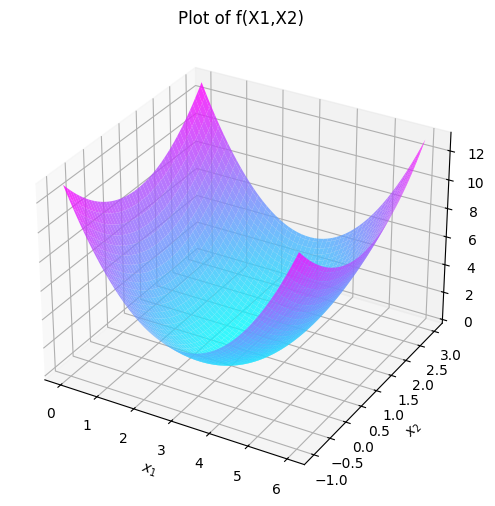

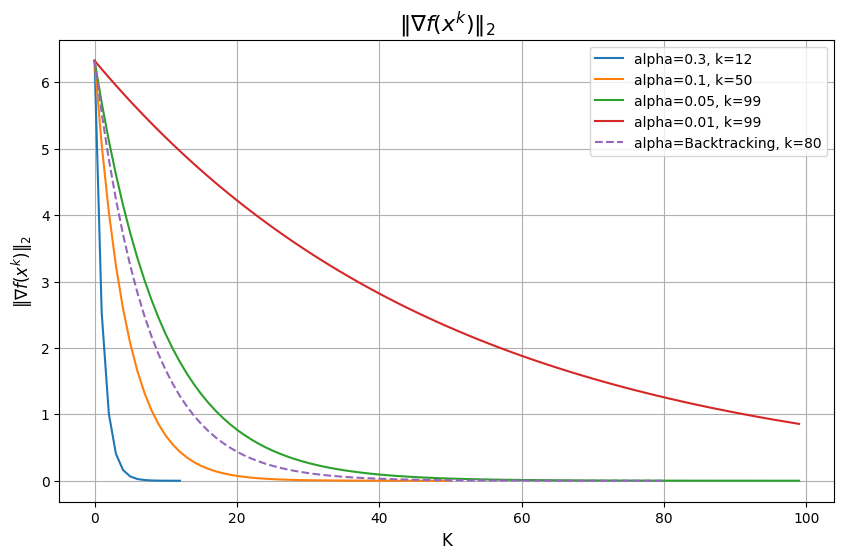

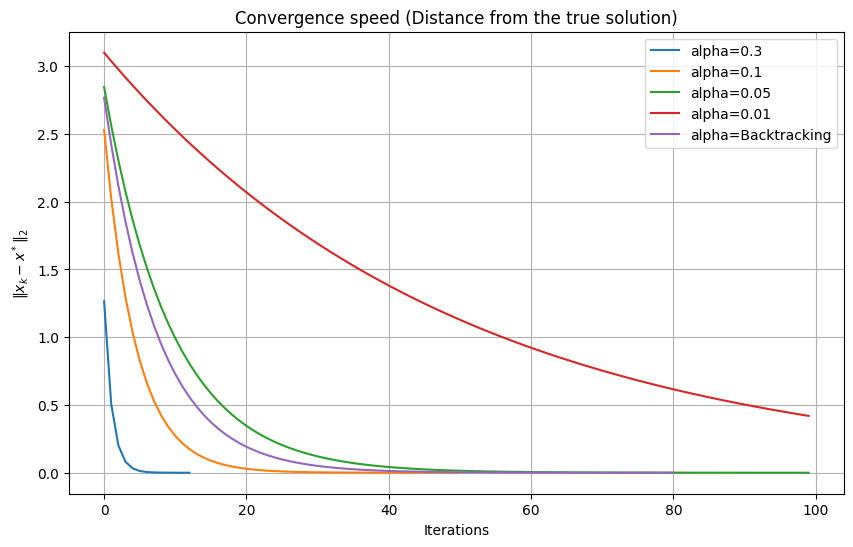

In [120]:

# x = [x1, x2]
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 3), 2*(x2 -1)])

alpha_values = [0.3, 0.1, 0.05, 0.01]
x0 = np.array([0, 0])
kmax = 100
tolf = 1e-5
tolx = 1e-5

# PLOT THE GRAPH
x1_vals = np.linspace(0, 6, 100)
x2_vals = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])  # Compute f(x) over the grid

# Plot the 3D surface of f(x)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='cool',alpha=0.8)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
ax.set_title('Plot of f(X1,X2)')
plt.show()

# Test and plot
results = test_GD(f, grad_f, alpha_values, x0, kmax, tolf, tolx)
plot_distance_true_solution(results,np.array([[3],[1]]))


 2. $f: \mathbb{R}^2 \to \mathbb{R}$ such that:

       $$
       f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2, 
       $$

       for which the true solution is $x^* = (1, 2)^T$.

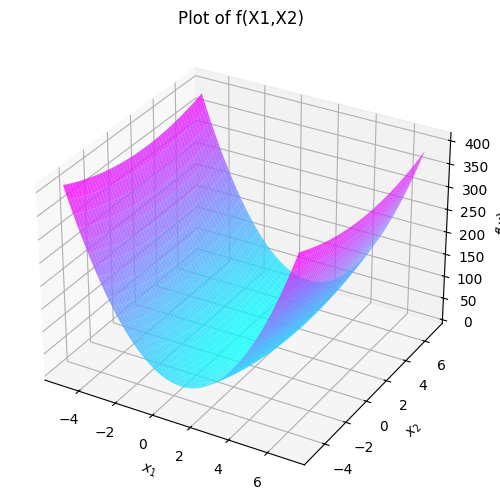

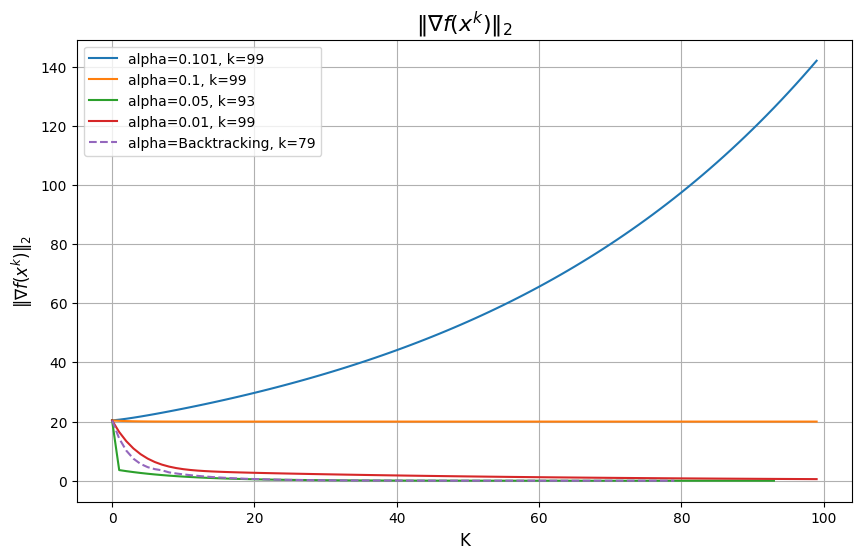

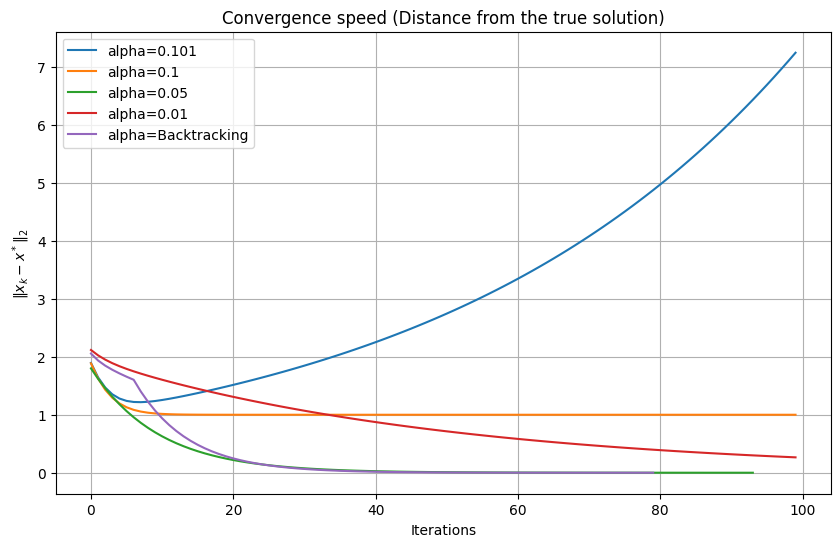

In [121]:
# x = [x1, x2]
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 -2)])


alpha_values = [0.101, 0.1, 0.05, 0.01]
x0 = np.zeros((2, ))
kmax = 100
tolf = 1e-5
tolx = 1e-5


# PLOT THE GRAPH
x1_vals = np.linspace(-5, 7, 100)
x2_vals = np.linspace(-5, 7, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])  # Compute f(x) over the grid

# Plot the 3D surface of f(x)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='cool',alpha=0.8)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
ax.set_title('Plot of f(X1,X2)')
plt.show()


# Test and plot
results = test_GD(f, grad_f, alpha_values, x0, kmax, tolf, tolx)
plot_distance_true_solution(results,np.array([[1],[2]]))

As we can see here, with alpha>0.1 the result diverge, with alpha=0.1 the result reamins the same so basically the algorthm stuck in the same two points going back and forth.

3. $f: \mathbb{R}^n \to \mathbb{R}$ such that:

$$
       f(x) = \frac{1}{2}|| Ax - b ||_2^2, 
$$

where $A \in \mathbb{R}^{ntimesn}$ is the Vandermonde matrix associated with the vector $v \in \mathbb{R}^n$ that contains $n$ equispaced values in the interval $[0,1]$, and $b \in \mathbb{R}^n$ is computed by first setting $x^* = (1, 1, \dots ,1)^T$, and then $b = A x^*$. Try for different values of $n$ (e.g. $n = 5,10,15, \dots$).

n=5


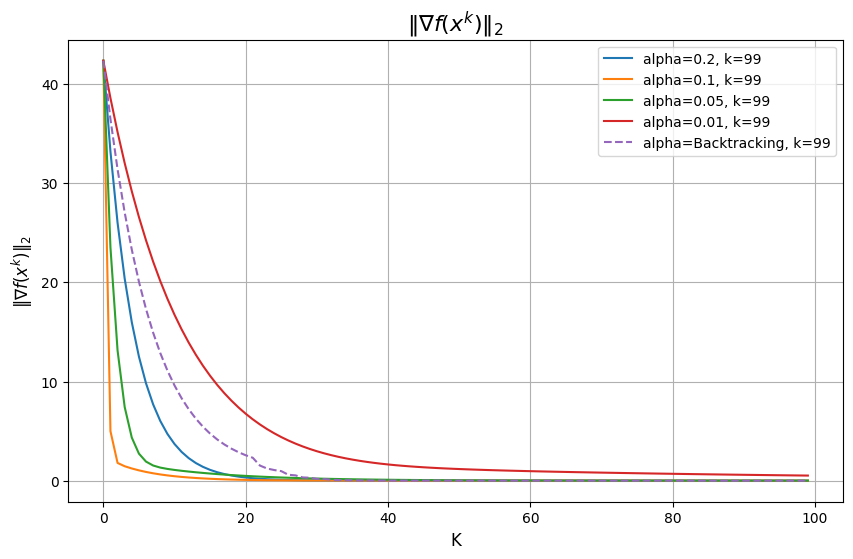

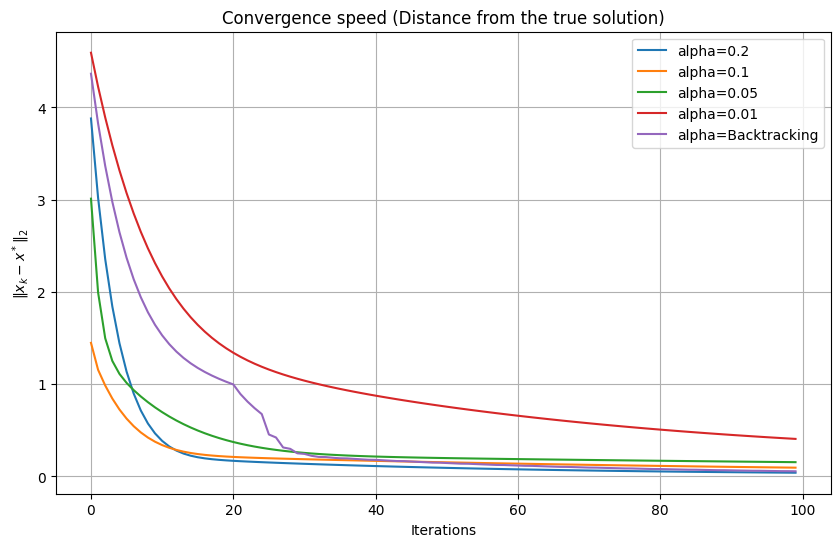

n=10


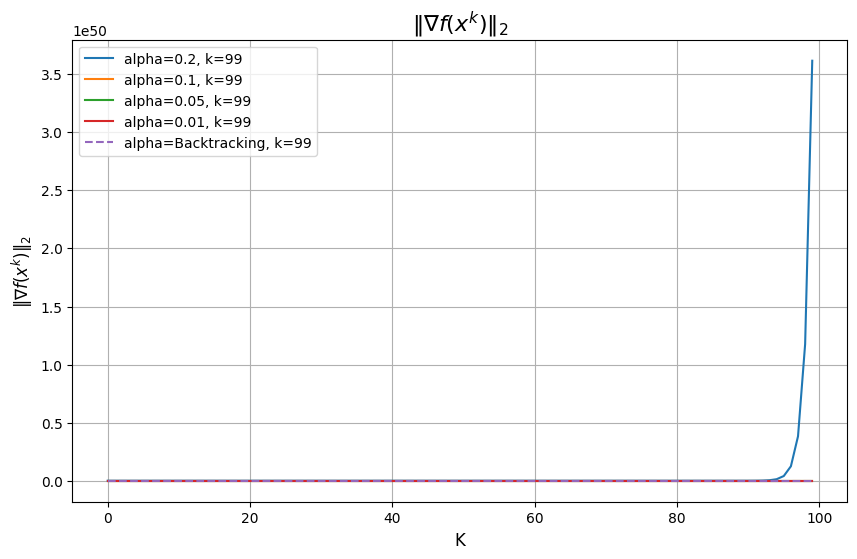

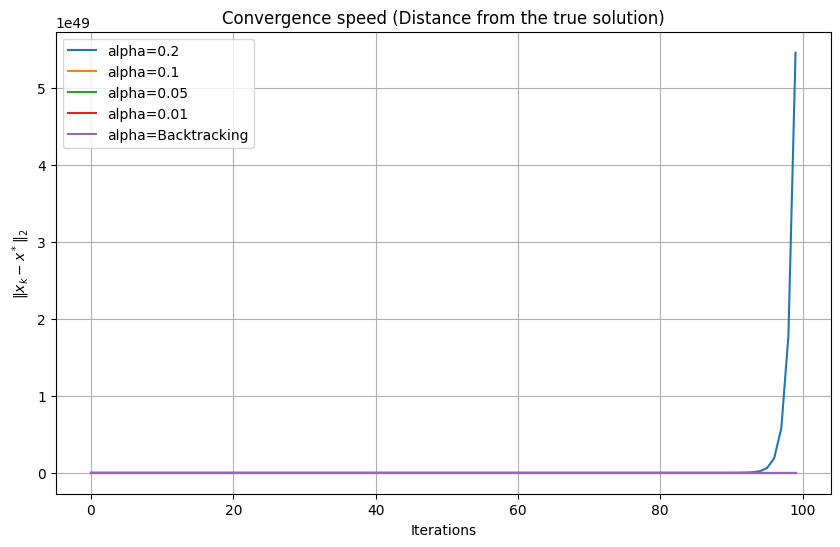

n=15


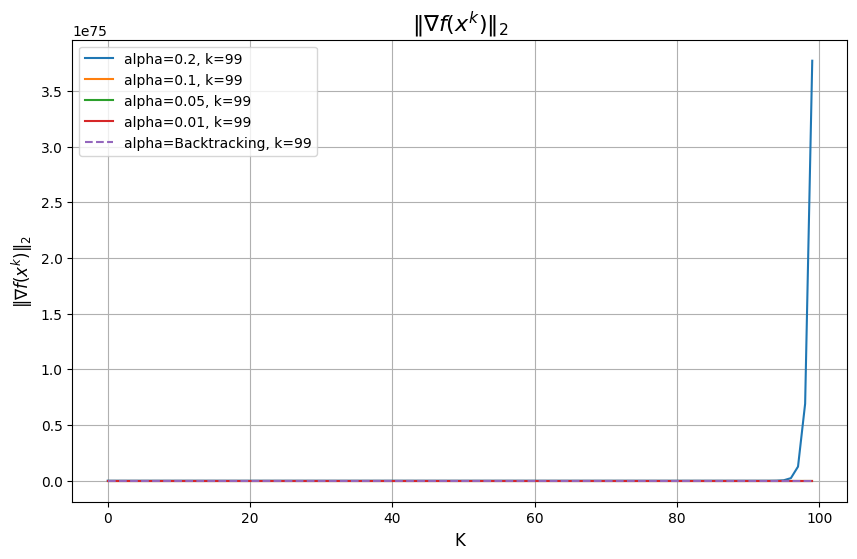

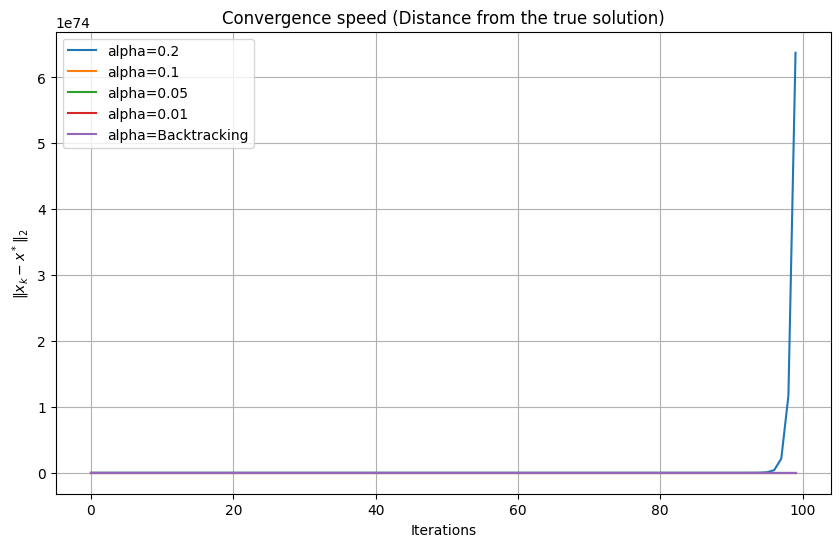

n=20


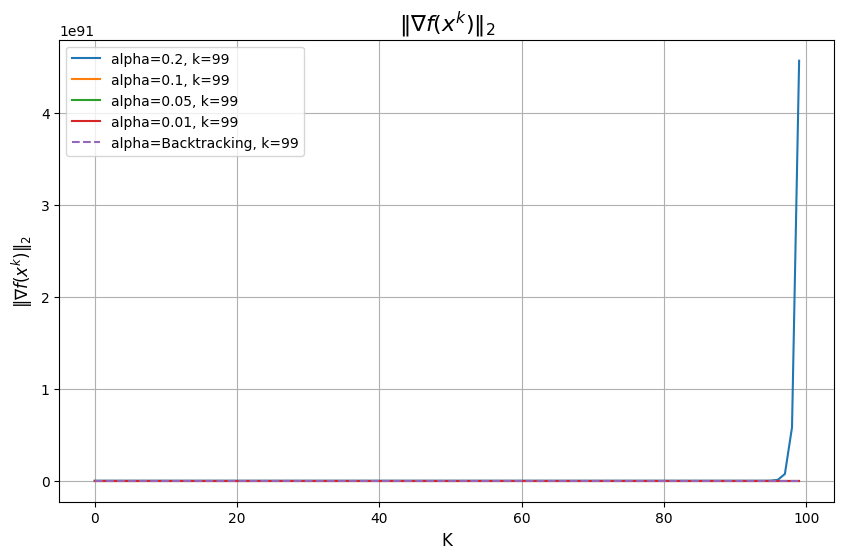

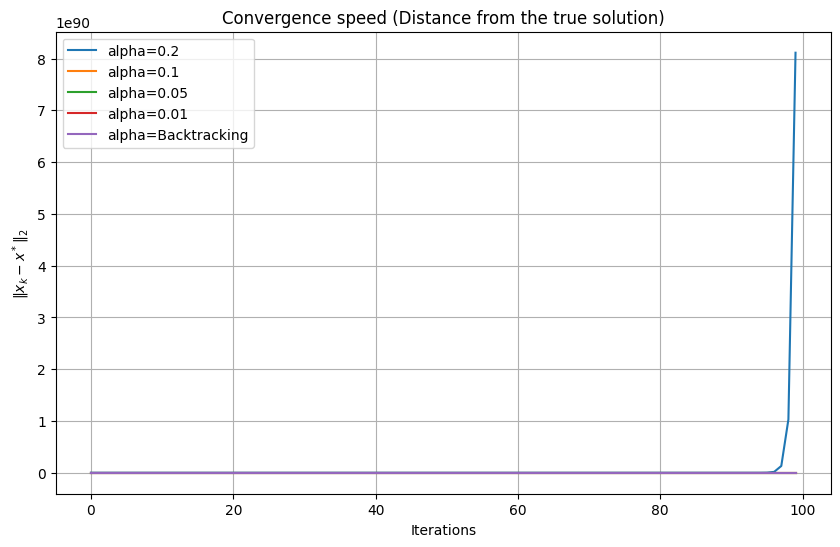

In [122]:
index_n=[5,10,15,20]
def generate_functions(A, b):
    def f(x):
        return 0.5 * np.linalg.norm(A @ x - b, 2)**2

    #gradient of the norm
    #||Ax-b||^2=(Ax-b)T*(Ax-b)->1/2(xTATAx-2bTAx+bTb)->gradf(x)=ATAx-Atb->At(Ax-b)
    def grad_f(x):
        return A.T @ (A @ x - b)
    return f, grad_f

for n in index_n:
    v=np.linspace(0,1,n)
    A=np.vander(v)
    x_t=np.ones((1,n)).T
    b=A@x_t
    
    # Generate the objective function and its gradient
    f, grad_f = generate_functions(A, b)

    alpha_values = [0.20, 0.1, 0.05, 0.01]
    x0 = np.zeros((n, ))
    kmax = 100
    tolf = 1e-5
    tolx = 1e-5

    # Test and plot
    print(f"n={n}")
    results = test_GD(f, grad_f, alpha_values, x0, kmax, tolf, tolx)
    plot_distance_true_solution(results,x_t)

As we can see here, as the dimension(n) rise the distance to the true solution tends to diverge for alpha larger, we know vandermorde matrix ill-condition, meaning that as n increase the condtion number $A^TA$
(a measure of sensitivity to numerical errors) grows exponentially, causing GD to diverge, remembering that each step is calulated as:
$$
||\nabla f(x_k)||_2=A^T(Ax-b)
$$
small error in computation get amplified!!

$f: \mathbb{R}^n \to \mathbb{R}$ such that:

$$
f(x) = \frac{1}{2} || Ax - b ||_2^2 + \frac{\lambda}{2} ||x||_2^2, 
$$

where $A \in \mathbb{R}^{n times n}$ and $b \in \mathbb{R}^n$ are the same of the exercise above, while $\lambda$ is a fixed value in the interval $[0, 1]$. Try different values of $\lambda$ and comment the result.

---------------------
lambda=0.001, n=5
---------------------


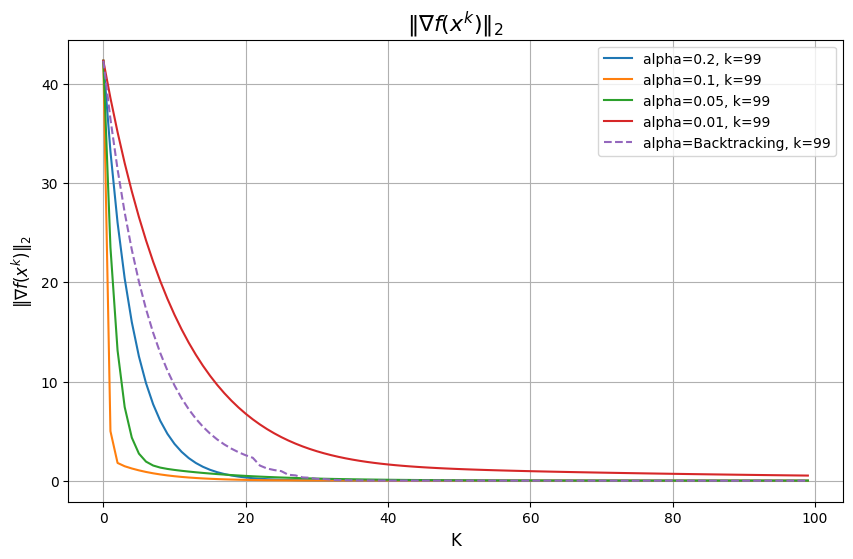

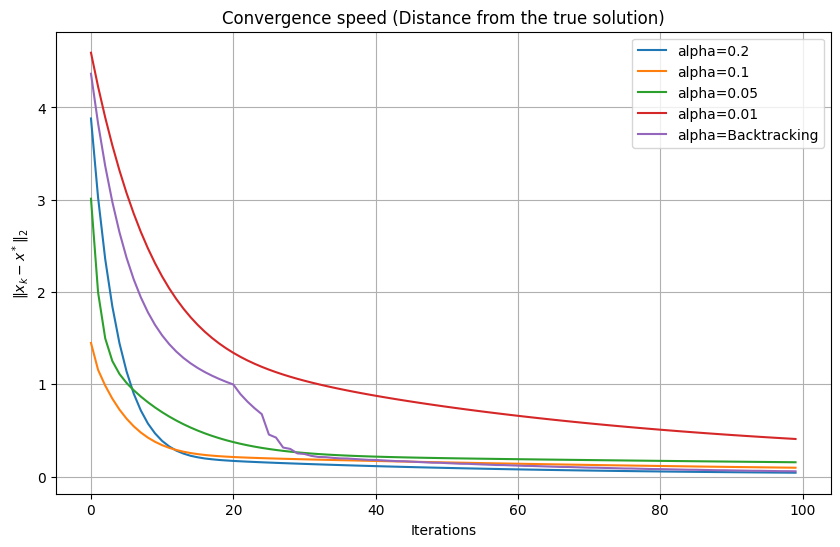

---------------------
lambda=0.01, n=5
---------------------


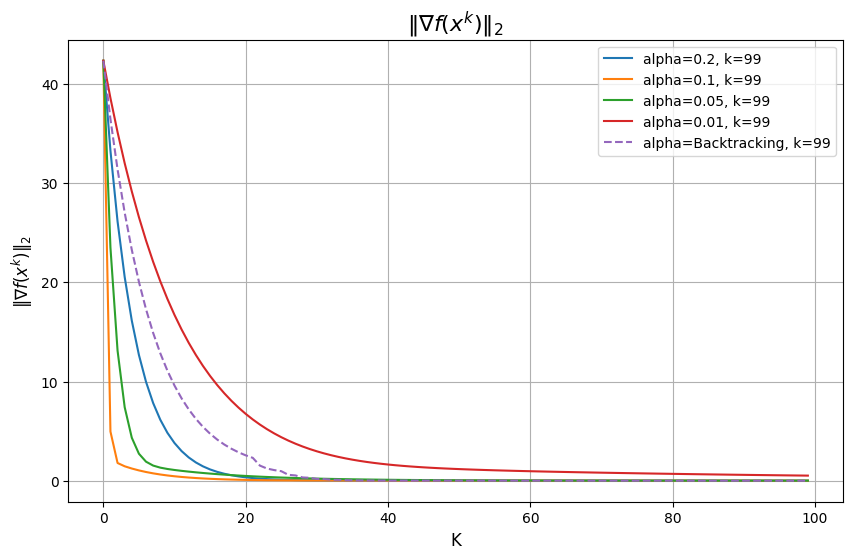

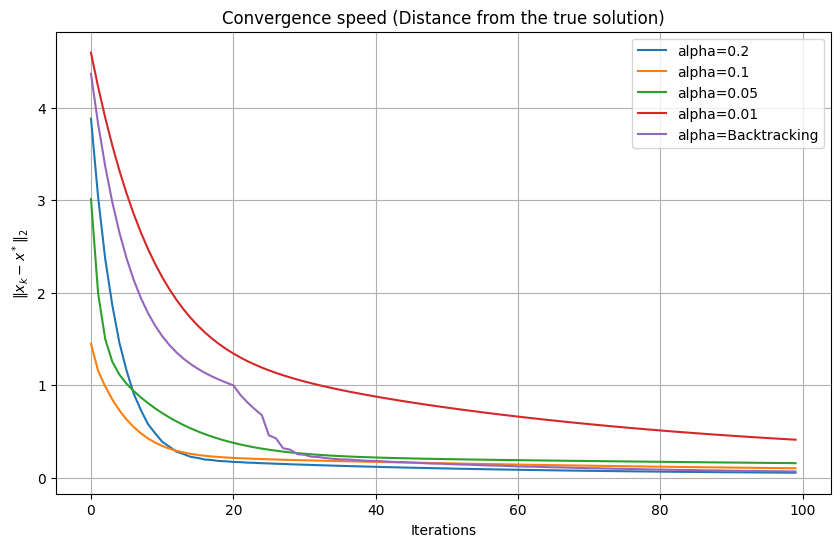

---------------------
lambda=0.5, n=5
---------------------


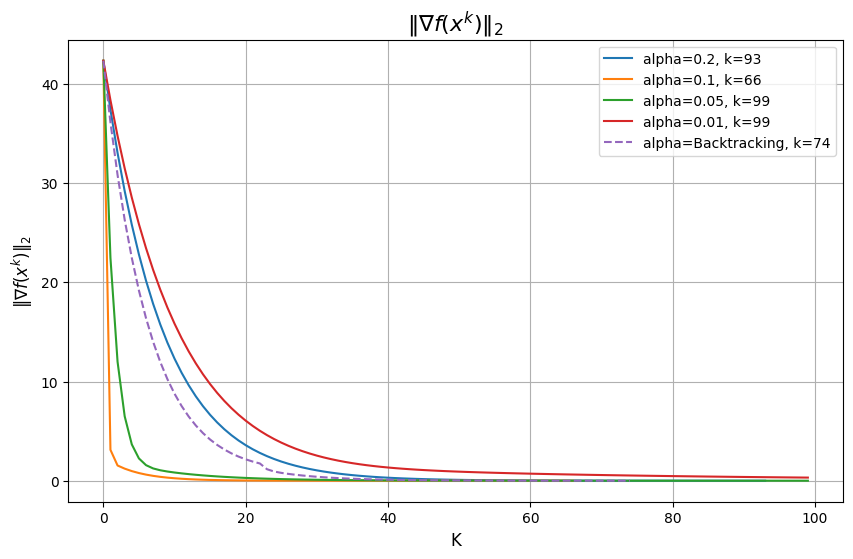

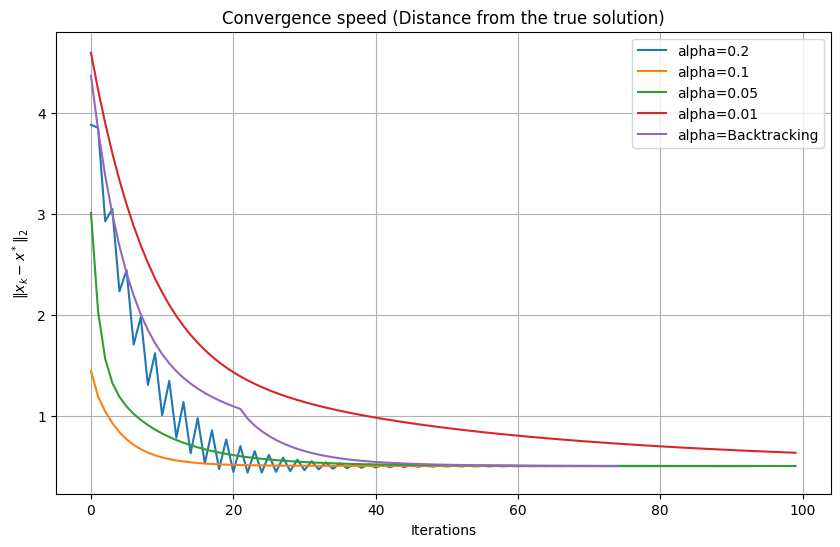

---------------------
lambda=1, n=5
---------------------


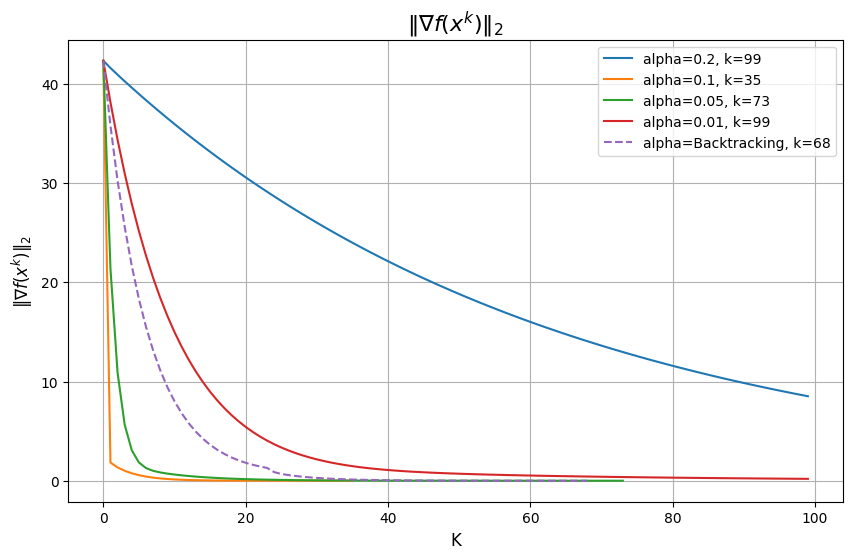

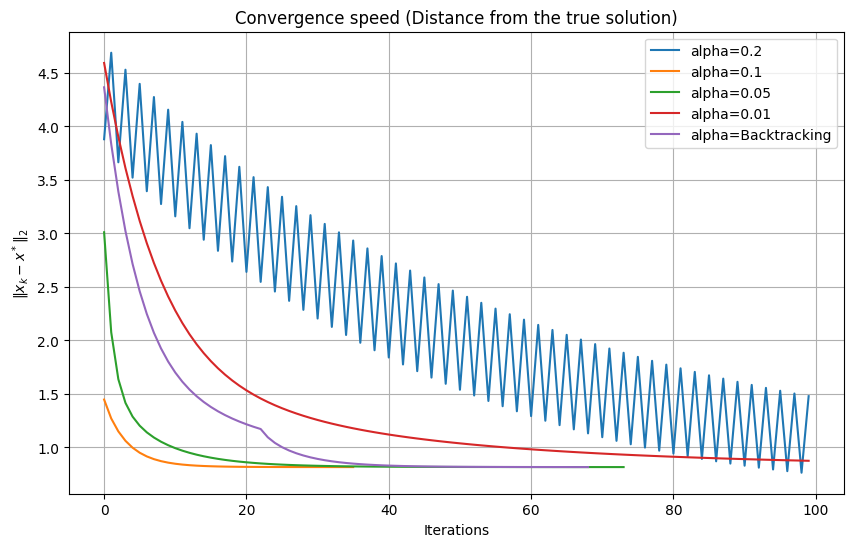

In [123]:
# Function to generate f and grad_f based on A, b, and lambda
def generate_functions_with_regularization(A, b, lambd):
    def f(x):
        return 0.5 * np.linalg.norm(A @ x - b, 2)**2 + 0.5 * lambd * np.linalg.norm(x, 2)**2

    def grad_f(x):
        return A.T @ (A @ x - b) + lambd * x

    return f, grad_f

# Main execution
lambdas = [0.001,0.01,0.5,1]
n = 5
v = np.linspace(0, 1, n)
A = np.vander(v)
x_t = np.ones((1, n)).T
b = A @ x_t

for lambd in lambdas:
    # Generate the objective function and its gradient
    f, grad_f = generate_functions_with_regularization(A, b, lambd)

    # Parameters for gradient descent
    alpha_values = [0.20, 0.1, 0.05, 0.01]
    x0 = np.zeros((n,))
    kmax = 100
    tolf = 1e-5
    tolx = 1e-5

    # Test and plot
    print("---------------------")
    print(f"lambda={lambd}, n={n}")
    print("---------------------")
    results = test_GD(f, grad_f, alpha_values, x0, kmax, tolf, tolx)
    plot_distance_true_solution(results, x_t)


The new $\lambda*||x||^2_2$ regularize the objective function(the condition number gets lower), this means it converges more quickly to the minimum because the updates are more stable and less prone to overshooting or divergence.
With large lambdas however we can see that the true distance to $x^*$ increase because the regularization term dominates the objective function, forcing the solution to have smaller norms instead of fitting $Ax=b$ perfectly, so we obtain some sort of underfit.

$f: \mathbb{R} \to \mathbb{R}$ such that:

$$
f(x) = x^4 + x^3 - 2x^2 - 2x.
$$

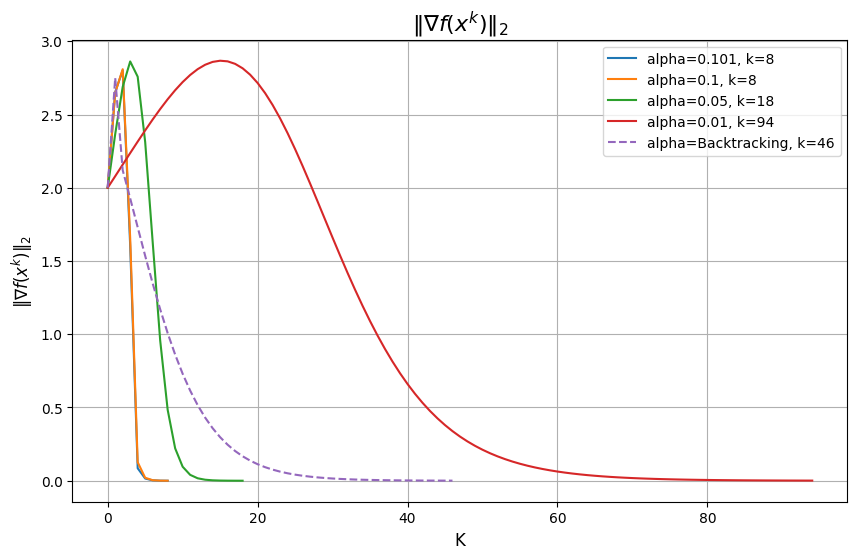

In [124]:
def f(x):
    return x[0]**4 + x[0]**3 - 2*x[0]**2 - 2*x[0] 

def grad_f(x):
    return np.array([4*x[0]**3 + 3*x[0]**2 - 4*x[0] - 2]) 


alpha_values = [0.101, 0.1, 0.05, 0.01]
x0 = np.zeros((1, ))
kmax = 100
tolf = 1e-5
tolx = 1e-5

# Test and plot
results = test_GD(f, grad_f, alpha_values, x0, kmax, tolf, tolx)


 Plot the graph of the non-convex function 5 in the interval $[−3,3]$, and test the convergence of GD with different values of `x0` (of your choice) and different step-sizes. When is the convergence point the global minimum?

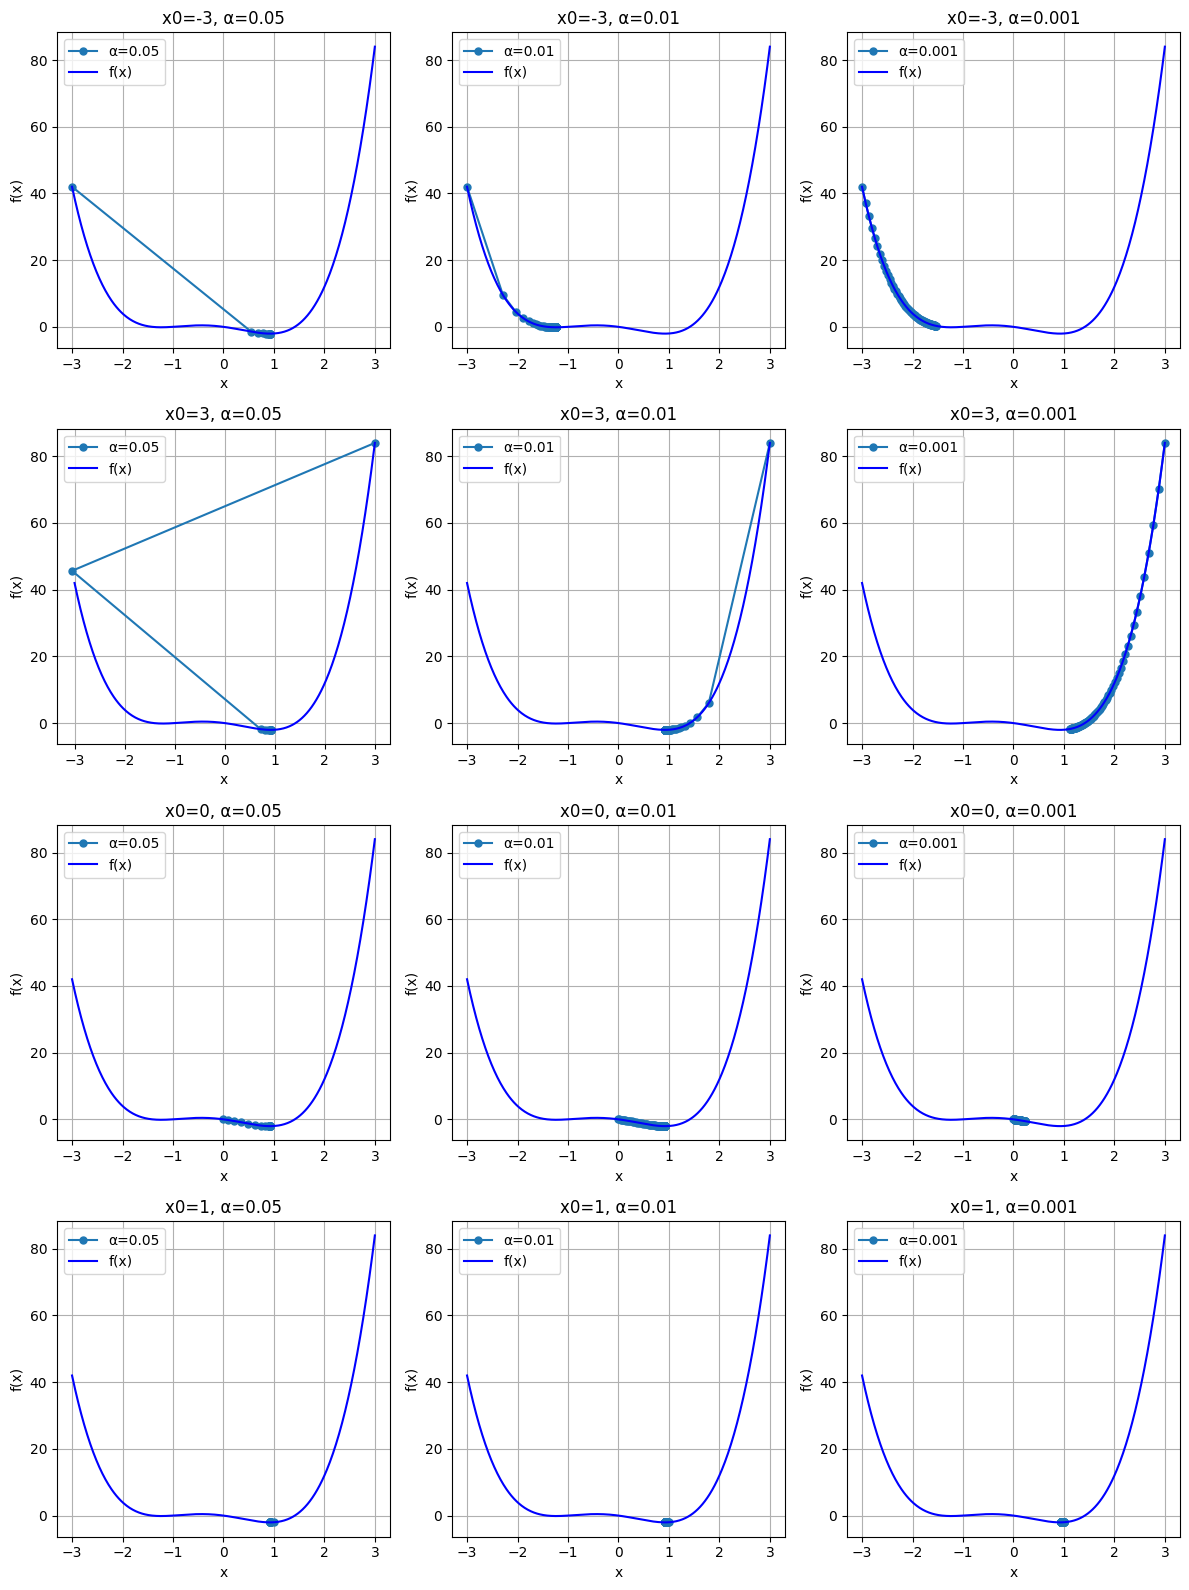

In [125]:
def f(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

# Plot the function and convergence for different step sizes
x_vals = np.linspace(-3, 3, 500)
y_vals = f(x_vals)
alpha_values = [0.05, 0.01, 0.001]
x0_values = [-3, 3, 0, 1]  # Only four initial points

fig, axes = plt.subplots(4, 3, figsize=(12, 16))

# Iterate over each initial point x0
for row_idx, x0 in enumerate(x0_values):
    for col_idx, alpha in enumerate(alpha_values):
        ax = axes[row_idx, col_idx]

        _, _, _, _, x_history = GD(f, grad_f, x0, alpha)
        x_history = [x0] + x_history
        ax.plot(x_history, f(np.array(x_history)), marker='o', markersize=5, label=f'α={alpha}')
        ax.plot(x_vals, y_vals, 'b-', label=f'f(x)')

        ax.set_title(f'x0={x0}, α={alpha}')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.legend()

plt.tight_layout()
plt.show()



 For functions 1 and 2, show the contour plot around the true minimum and visualize the path described by the iterations, i.e. representing on the contour plot the position of each iterate computed by the GD algorithm. See the `plt.contour` documentation.

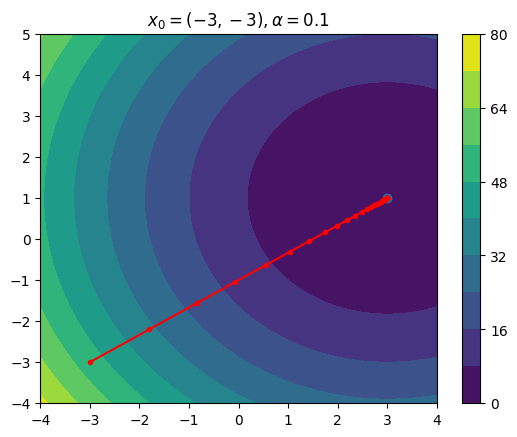

In [126]:
# x = [x1, x2]
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1 - 3), 2*(x2 -1)])

x0 = np.array([-3,-3])
kmax = 100
tolf = 1e-5
tolx = 1e-5
alpha=0.1
x, k, f_val, grad_norm,x_history = GD(f, grad_f, x0, alpha)
x_history = [x0] + x_history
x_history=np.array(x_history)
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 5, 100)
x, y = np.meshgrid(x, y)
z = f((x,y))
fig, ax = plt.subplots()
plt.contourf(x, y, z, levels=10)
plt.colorbar()
ax.plot(x_history[:,0:1], x_history[:,1:2],'r.-')
ax.scatter(3,1)#the true solution
plt.title(f'$x_0=({x0[0]},{x0[1]}), \\alpha={alpha}$')
plt.show()


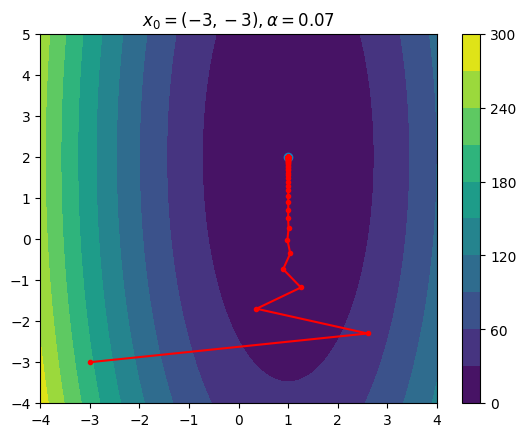

In [127]:
# x = [x1, x2]
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 -2)])

x0 = np.array([-3, -3])
kmax = 100
tolf = 1e-5
tolx = 1e-5
alpha=0.07
x, k, f_val, grad_norm,x_history = GD(f, grad_f, x0, alpha)
x_history = [x0] + x_history
x_history=np.array(x_history)
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 5, 100)
x, y = np.meshgrid(x, y)
z = f((x,y))
fig, ax = plt.subplots()
plt.contourf(x, y, z, levels=10)
plt.colorbar()
ax.plot(x_history[:,0:1], x_history[:,1:2],'r.-')
ax.scatter(1,2)#the true solution
plt.title(f'$x_0=({x0[0]},{x0[1]}), \\alpha={alpha}$')
plt.show()

## Optimization via Stochastic Gradient Descent

In [128]:
import time
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X,y=D
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history, loss_history, grad_norm_history

def GD(loss, grad_f, theta0, alpha, X, y, maxit=100, tolf=1e-16, tolx=1e-16):
    # Initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))
    theta_history = []

    # Set the values for theta0
    f_val[0] = loss(theta0, X, y)  # Store the initial loss
    grad_norm[0] = np.linalg.norm(grad_f(theta0, X, y))
    theta_history.append(theta0.copy())

    # Main loop for updating the model parameters
    for k in range(maxit):
        grad = grad_f(theta0, X, y)  
        theta = theta0 - alpha * grad  # Perform a gradient descent step

        theta_history.append(theta.copy())

        f_val[k+1] = loss(theta, X, y)  # Store the loss at each iteration
        grad_norm[k+1] = np.linalg.norm(grad)

        # Check stopping criteria
        if grad_norm[k+1] <= tolf * grad_norm[0] or np.linalg.norm(theta - theta0) < tolx:
            break

        theta0 = theta.copy()

    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return theta, k, f_val, grad_norm, theta_history

def f(x, theta):
    y = 0
    for j in range(len(theta)):
        y += theta[j] * x**j
    return y

def loss(theta, X, y):
    y_pred = f(X, theta)
    loss = np.square(y_pred - y)
    return np.mean(loss)

def grad_loss(theta, X, Y):

    N = len(Y)  # Number of data points
    K = len(theta)  # Number of coefficients
    grad = np.zeros_like(theta)  # Initialize gradient vector
    
    for i in range(N):
        # Compute f_theta(x^i)
        f_theta = f(X[i], theta)
        # Residual: f_theta(x^i) - y^i
        residual = f_theta - Y[i]
        # Gradient of f_theta(x^i) -> theta: [1, x^i, (x^i)^2, ..., (x^i)^(K-1)]
        grad_f_theta = np.array([X[i]**j for j in range(K)])
        # Accumulate gradient contribution
        grad += residual * grad_f_theta
    
    return (2 / N) * grad

#hyperparameters
n_batch_large_set=20
n_batch_small_set=6
n_epochs_small=1000
n_epochs_large=1000
k_iteration=5000
alpha_model1=0.2  #SGD on large
alpha_model2=0.5  #GD on large
alpha_model3=0.2  #SGD on small
alpha_model3_2=0.5  #GD on small

I choose these hyperparameters after various tries of getting near the true_theta of the last point.

Consider the dataset `poly_regression_large.csv`, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

* Split the dataset into training and test set as in the Homework 2, with a proportion of 80% training and 20% test. 
Fix a degree $K$ for the polynomial.


In [129]:
# Load data
import pandas as pd
data = pd.read_csv("./poly_regression_large.csv")
# Extract `x` and `y` columns as NumPy arrays

X, Y = data["x"], data["y"]
X=np.array(X)
Y=np.array(Y)
print(f"X:{X.shape},Y:{Y.shape}")
def split_data(X, Y, training_percentage):
    N= X.shape[0]
    print(N)
    idx = np.arange(N)
    np.random.shuffle(idx)
    train_idx = idx[:int(N*training_percentage)]
    test_idx = idx[int(N*training_percentage):]

    X_train = X[train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Test it
(X_train, Y_train), (X_test, Y_test) = split_data(X, Y, 0.80)
print(X_train.shape) 

print(X_test.shape)

X:(1000,),Y:(1000,)
1000
(800,)
(200,)


 
* Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.

In [130]:
def model1(degree,X_train,Y_train,batch_size,n_epochs,alpha):
        # Hyperparameters
    theta0 = np.ones(degree)  # Initial theta
    start=time.time();
    # Train the model
    theta_history, loss_history, grad_norm_history = SGD(
        loss, grad_loss, (X_train, Y_train), theta0, alpha, batch_size, n_epochs
    )
    time1=time.time()-start
    return theta_history,time1,loss_history,grad_norm_history
    
theta_history1,time1,errors1,grad_norm_history1=model1(5,X_train,Y_train,n_batch_large_set,n_epochs_large,alpha_model1)


Remebreing that the gradient of the loss function is:
$$
{\nabla_\theta \ell(\theta; X, Y)}={\frac{2}{N} \sum_{i=1}^N (f_\theta(x^i) - y^i) \nabla_\theta f_\theta(x^i)}
$$
the gradient of the $$\nabla_\theta f_\theta(x^i)=x^i$$

* Train the polynomial regression model on the training set via the Gradient Descent algorithm.

In [131]:
def model2(degree,X_train,Y_train,alpha,max_iterations):
    theta0 = np.ones(degree)  # Random initial weights for the polynomial
    start=time.time()
    optimized_parameters, iterations, errors, gradient_norms, history = GD(loss, grad_loss, theta0, alpha, X_train, Y_train, max_iterations)
    time2=time.time()-start
    return history,time2,errors,gradient_norms
theta_history2,time2,errors2,grad_norm_history2=model2(5,X_train,Y_train,alpha_model2,k_iteration)

* Train the polynomial regression model on the `poly_regression_small.csv` dataset. Use the full dataset for this test, without splitting it into training and test set.

In [132]:
# Load data
import pandas as pd
data = pd.read_csv("./poly_regression_small.csv")
# Extract `x` and `y` columns as NumPy arrays

X_small, Y_small = data["x"], data["y"]
X_small=np.array(X_small)
Y_small=np.array(Y_small)

#via SGD
theta_history3, time3,errors3,grad_norm_history3=model1(5,X_small,Y_small,n_batch_small_set,n_epochs_large,alpha_model3)
#via GD
theta_history3_2,time3_2,errors3_2,grad_norm_history3_2=model2(5,X_small,Y_small,alpha_model3_2,k_iteration)

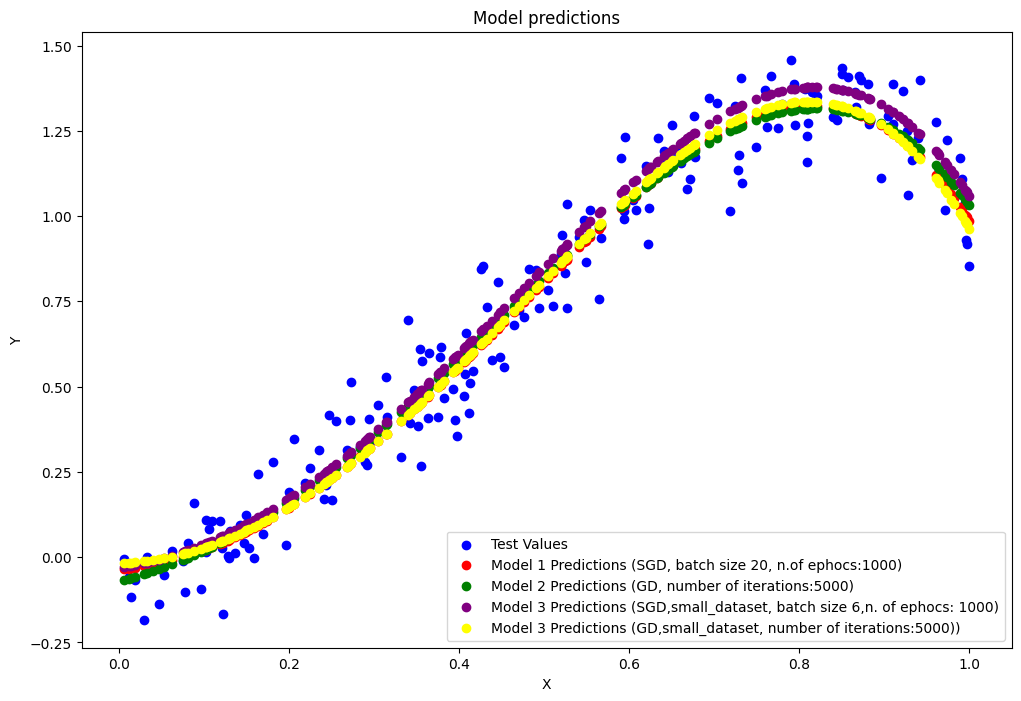

In [133]:
# Plot actual vs predicted values for all models
plt.figure(figsize=(12, 8))
plt.scatter(X_test, Y_test, color="blue", label="Test Values")

# Model 1 Predictions SGD small dataset
y_pred_model1 = f(X_test, theta_history1[-1])
plt.scatter(X_test, y_pred_model1, color="red", label=f"Model 1 Predictions (SGD, batch size {n_batch_large_set}, n.of ephocs:{n_epochs_large})")

# Model 2 Predictions GD large dataset
y_pred_model2 = f(X_test, theta_history2[-1])
plt.scatter(X_test, y_pred_model2, color="green", label=f"Model 2 Predictions (GD, number of iterations:{k_iteration})")

# Model 3 Predictions  SGD
y_pred_model3 = f(X_test, theta_history3[-1])
plt.scatter(X_test, y_pred_model3, color="purple", label=f"Model 3 Predictions (SGD,small_dataset, batch size {n_batch_small_set},n. of ephocs: {n_epochs_small})")

# Model 3 Predictions  GD on small dataset
y_pred_model3_2 = f(X_test, theta_history3_2[-1])
plt.scatter(X_test, y_pred_model3_2, color="yellow", label=f"Model 3 Predictions (GD,small_dataset, number of iterations:{k_iteration}))")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Model predictions")
plt.legend()
plt.show()


* Compare the performance of the three regression model computed above. In particular, if $(X_{test}, Y_{test})$ is the test set from the `poly_regression_large.csv` dataset, for each of the model, compute:

  $$
  Err = \frac{1}{N_{test}} \sum_{i=1}^{N_{test}} (f_\theta(x^i) - y^i)^2,
  $$

  where $N_{test}$ is the number of elements in the test set, $(x^i, y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

In [134]:
# Compare errors on test data
def error(theta, X, y):
    y_pred = f(X, theta)
    error = np.square(y_pred - y)
    return np.mean(error)

#y_pred_gd = f(X_test, theta_history1)
error_sgd = error(theta_history1[-1], X_test, Y_test)

#y_pred_sgd = f(X_test, optimized_params2)
error_gd = error(theta_history2[-1], X_test, Y_test)

#y_pred_sgd_small = f(X_test, theta_history3)
error_sgd_small = error(theta_history3[-1], X_test, Y_test)

error_gd_small = error(theta_history3_2[-1], X_test, Y_test)

print(f"SGD Error: {error_gd},Time of computation: {time1}")
print(f"GD Error: {error_sgd},TIme of computation: {time2}")
print(f"SGD Error on small dataset: {error_sgd_small},TIme of computation:{time3}")
print(f"GD Error on small dataset: {error_gd_small},TIme of computation:{time3_2}")

SGD Error: 0.009202669376984796,Time of computation: 6.001309871673584
GD Error: 0.009500350492904278,TIme of computation: 25.79774761199951
SGD Error on small dataset: 0.010213205134356786,TIme of computation:0.46594858169555664
GD Error on small dataset: 0.009649478826738002,TIme of computation:1.8152189254760742


## Comparison ephocs/iterations loss

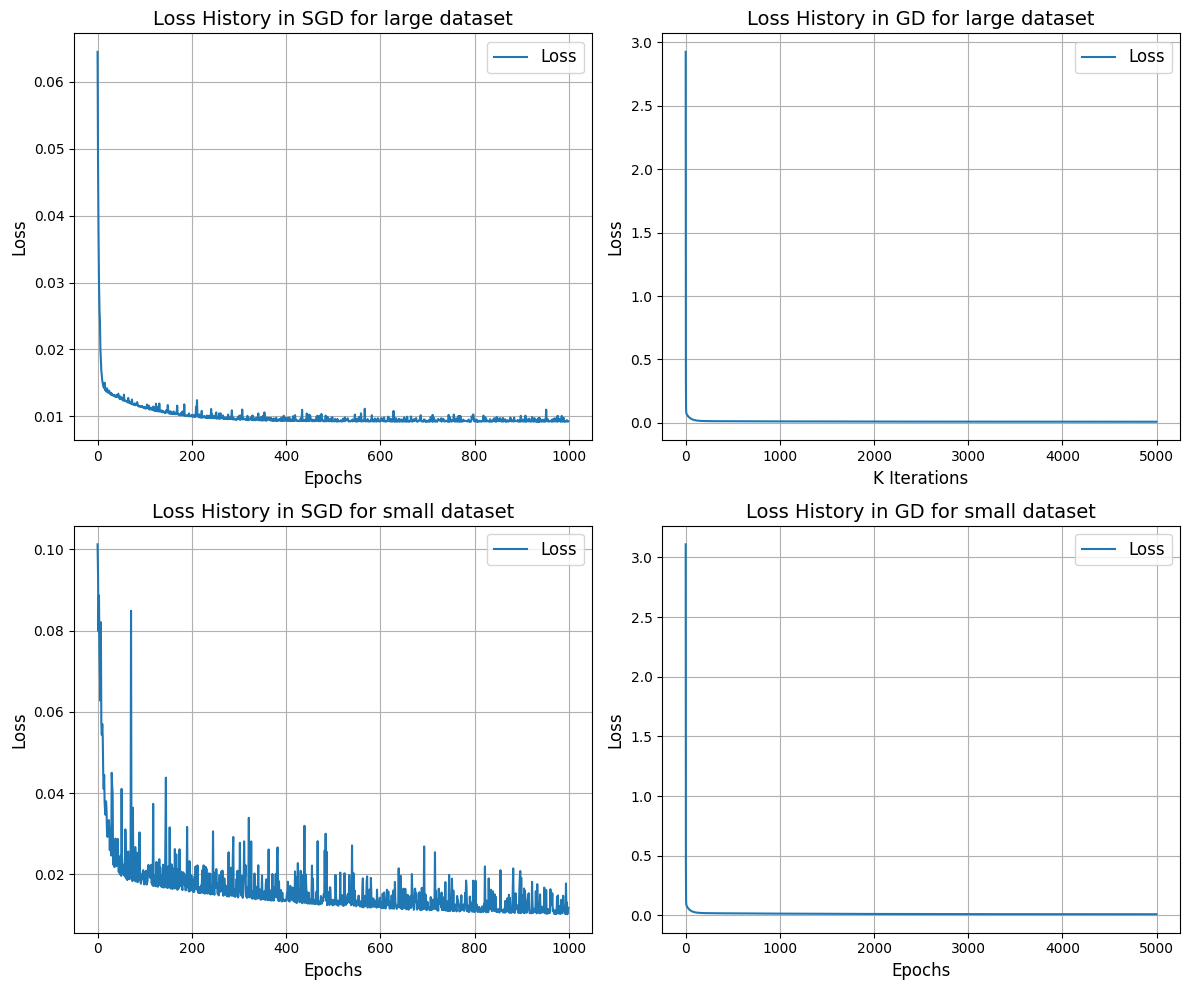

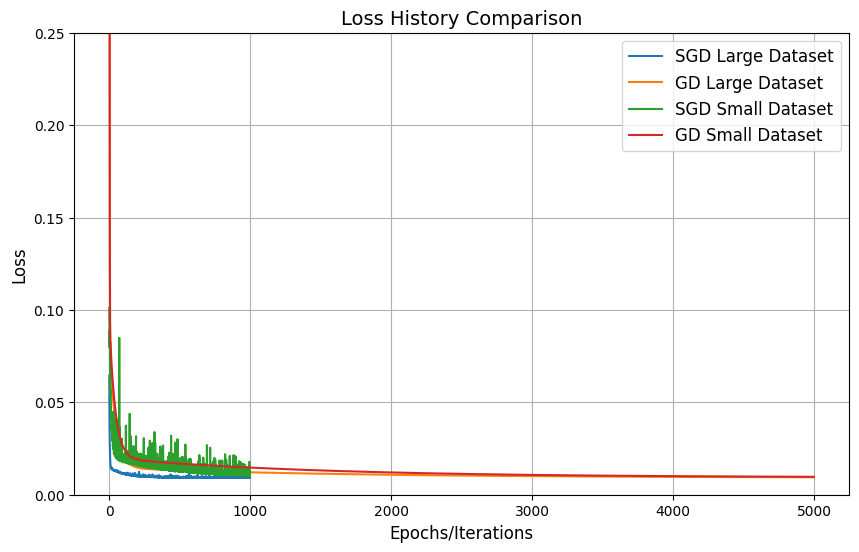

In [135]:
# Create a single figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Loss History in SGD for large dataset
axs[0, 0].plot(range(len(errors1)), errors1, label="Loss")
axs[0, 0].set_xlabel("Epochs", fontsize=12)
axs[0, 0].set_ylabel("Loss", fontsize=12)
axs[0, 0].set_title("Loss History in SGD for large dataset", fontsize=14)
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize=12)

# Subplot 2: Loss History in GD for large dataset
axs[0, 1].plot(range(len(errors2)), errors2, label="Loss")
axs[0, 1].set_xlabel("K Iterations", fontsize=12)
axs[0, 1].set_ylabel("Loss", fontsize=12)
axs[0, 1].set_title("Loss History in GD for large dataset", fontsize=14)
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize=12)

# Subplot 3: Loss History in SGD for small dataset
axs[1, 0].plot(range(len(errors3)), errors3, label="Loss")
axs[1, 0].set_xlabel("Epochs", fontsize=12)
axs[1, 0].set_ylabel("Loss", fontsize=12)
axs[1, 0].set_title("Loss History in SGD for small dataset", fontsize=14)
axs[1, 0].grid(True)
axs[1, 0].legend(fontsize=12)

# Subplot 4: Loss History in GD for small dataset
axs[1, 1].plot(range(len(errors3_2)), errors3_2, label="Loss")
axs[1, 1].set_xlabel("Epochs", fontsize=12)
axs[1, 1].set_ylabel("Loss", fontsize=12)
axs[1, 1].set_title("Loss History in GD for small dataset", fontsize=14)
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))


plt.plot(range(len(errors1)), errors1, label="SGD Large Dataset")
plt.plot(range(len(errors2)), errors2, label="GD Large Dataset")
plt.plot(range(len(errors3)), errors3, label="SGD Small Dataset")
plt.plot(range(len(errors3_2)), errors3_2, label="GD Small Dataset")
plt.ylim(0, 0.25)

plt.xlabel("Epochs/Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Loss History Comparison", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)


plt.show()



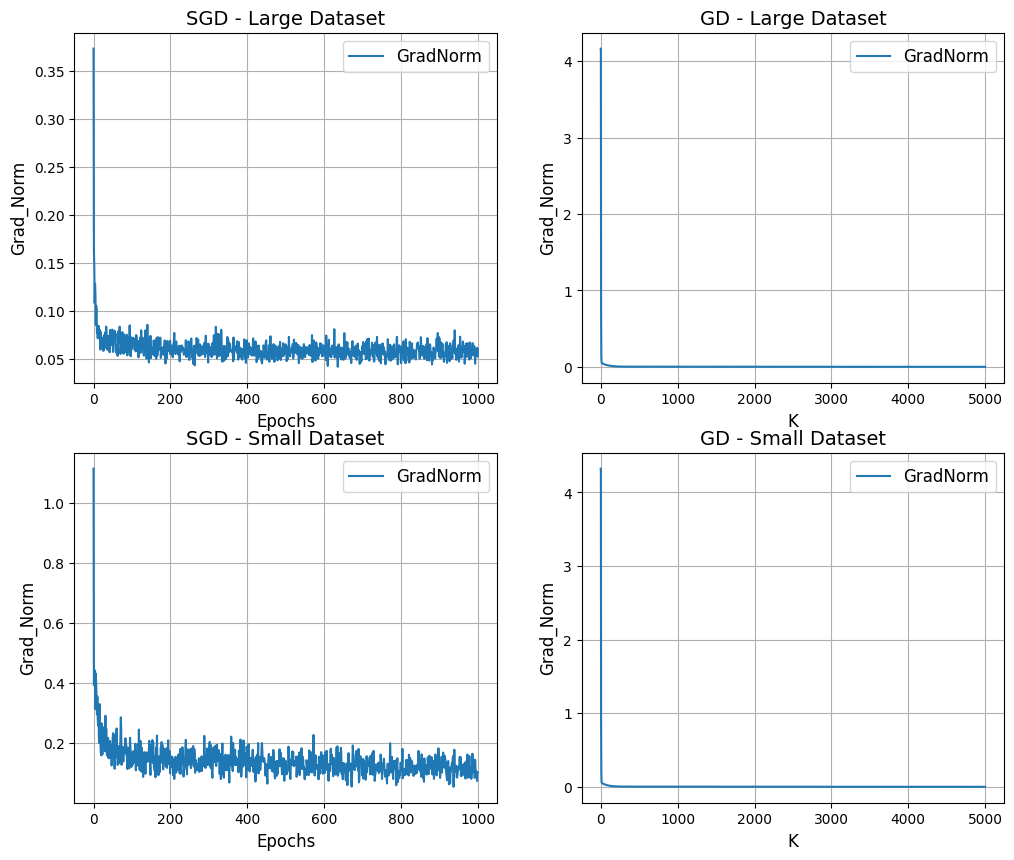

In [136]:
# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: GradNorm History in SGD for large dataset
axs[0, 0].plot(range(len(grad_norm_history1)), grad_norm_history1, label="GradNorm")
axs[0, 0].set_xlabel("Epochs", fontsize=12)
axs[0, 0].set_ylabel("Grad_Norm", fontsize=12)
axs[0, 0].set_title("SGD - Large Dataset", fontsize=14)
axs[0, 0].grid(True)
axs[0, 0].legend(fontsize=12)

# Subplot 2: GradNorm History in GD for large dataset
axs[0, 1].plot(range(len(grad_norm_history2)), grad_norm_history2, label="GradNorm")
axs[0, 1].set_xlabel("K", fontsize=12)
axs[0, 1].set_ylabel("Grad_Norm", fontsize=12)
axs[0, 1].set_title("GD - Large Dataset", fontsize=14)
axs[0, 1].grid(True)
axs[0, 1].legend(fontsize=12)

# Subplot 3: GradNorm History in SGD for small dataset
axs[1, 0].plot(range(len(grad_norm_history3)), grad_norm_history3, label="GradNorm")
axs[1, 0].set_xlabel("Epochs", fontsize=12)
axs[1, 0].set_ylabel("Grad_Norm", fontsize=12)
axs[1, 0].set_title("SGD - Small Dataset", fontsize=14)
axs[1, 0].grid(True)
axs[1, 0].legend(fontsize=12)

# Subplot 4: GradNorm History in GD for small dataset
axs[1, 1].plot(range(len(grad_norm_history3_2)), grad_norm_history3_2, label="GradNorm")
axs[1, 1].set_xlabel("K", fontsize=12)
axs[1, 1].set_ylabel("Grad_Norm", fontsize=12)
axs[1, 1].set_title("GD - Small Dataset", fontsize=14)
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize=12)



* Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.

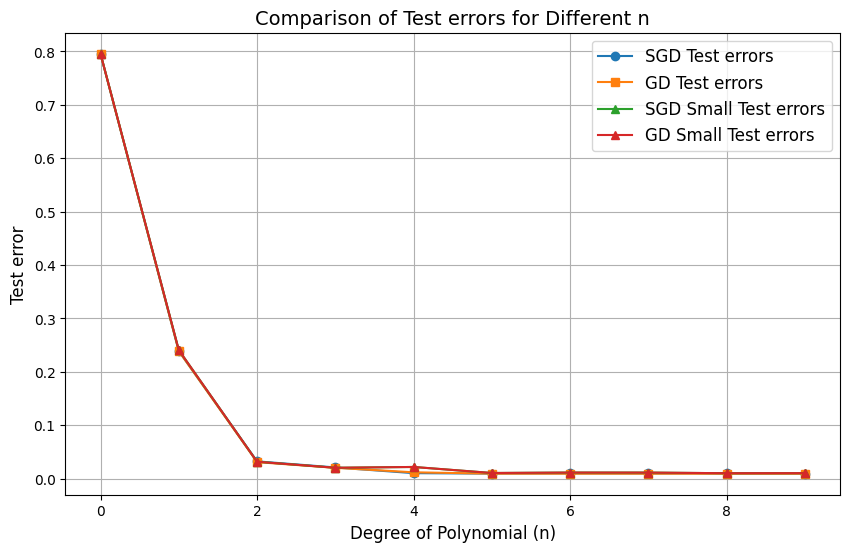

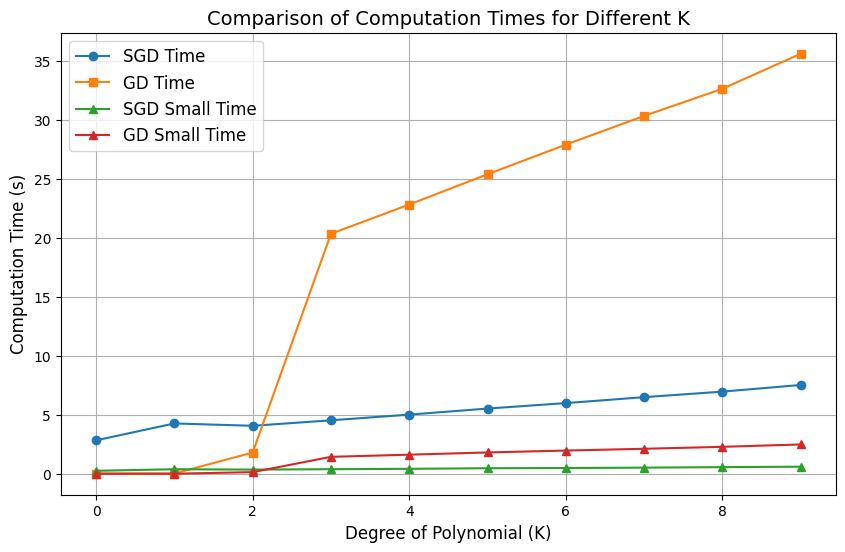

In [137]:
import matplotlib.pyplot as plt

# Initialize lists to store results for plotting
k_values = list(range(10))
sgd_test_error = []
gd_test_error = []
sgd_small_test_error = []
gd_small_test_error = []
sgd_times = []
gd_times = []
sgd_small_times = []
gd_small_times = []

# Run the experiments for different k values
for k in k_values:
    theta1, time1, errors1, grad_norms1 = model1(k, X_train, Y_train, n_batch_large_set, n_epochs_large, alpha_model1)
    theta2, time2, errors2, grad_norms2 = model2(k, X_train, Y_train, alpha_model2, k_iteration)
    theta3, time3, errors3, grad_norms3 = model1(k, X_small, Y_small, n_batch_small_set, n_epochs_large, alpha_model3)
    theta3_2, time3_2, errors3_2, grad_norms3_2 = model2(k, X_small, Y_small, alpha_model3_2, k_iteration)
    
    # Compute test errors
    test_error_sgd = error(theta1[-1], X_test, Y_test)
    test_error_gd = error(theta2[-1], X_test, Y_test)
    test_error_sgd_small = error(theta3[-1], X_test, Y_test)
    test_error_gd_small = error(theta3[-1], X_test, Y_test)

    # Save the results for plotting
    sgd_test_error.append(test_error_sgd)
    gd_test_error.append(test_error_gd)
    sgd_small_test_error.append(test_error_sgd_small)
    gd_small_test_error.append(test_error_gd_small)
    sgd_times.append(time1)
    gd_times.append(time2)
    sgd_small_times.append(time3)
    gd_small_times.append(time3_2)

# Plot 1: Test Errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, sgd_test_error, label="SGD Test errors", marker='o')
plt.plot(k_values, gd_test_error, label="GD Test errors", marker='s')
plt.plot(k_values, sgd_small_test_error, label="SGD Small Test errors", marker='^')
plt.plot(k_values, gd_small_test_error, label="GD Small Test errors", marker='^')
plt.xlabel("Degree of Polynomial (n)", fontsize=12)
plt.ylabel("Test error", fontsize=12)
plt.title("Comparison of Test errors for Different n", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# Plot 2: Computation Times
plt.figure(figsize=(10, 6))
plt.plot(k_values, sgd_times, label="SGD Time", marker='o')
plt.plot(k_values, gd_times, label="GD Time", marker='s')
plt.plot(k_values, sgd_small_times, label="SGD Small Time", marker='^')
plt.plot(k_values, gd_small_times, label="GD Small Time", marker='^')
plt.xlabel("Degree of Polynomial (K)", fontsize=12)
plt.ylabel("Computation Time (s)", fontsize=12)
plt.title("Comparison of Computation Times for Different K", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


As we can see, GD perform well on small dataset compared to larger ones,where we can see that computing the gradient of the full dataset become very time-consuming, while SGD remain similar even when we augment the Degree of the polynomial or augment the dataset in training.

* Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^* = [0, 0, 4, 0, -3]$.

In [138]:
theta_star = np.array([0, 0, 4, 0, -3])

# Train the models with K=5
n = 5
theta1, time1, errors1,grad_norm_history1 = model1(n, X_train, Y_train, n_batch_large_set, n_epochs_large,alpha_model1)
theta2, time2, errors2,grad_norm_history2 = model2(n, X_train, Y_train, alpha_model2, k_iteration)
theta3, time3, errors3,grad_norm_history3 = model1(n, X_small, Y_small, n_batch_small_set, n_epochs_small,alpha_model3)
theta3_2, time3_2, errors3_2,grad_norm_history3_2 = model2(n, X_small, Y_small, alpha_model3_2, k_iteration)
print(f"Learned theta in Model 1(SGD LARGE DATASET): {[f'{value:.2f}' for value in theta1[-1].flatten()]}")
print(f"Learned theta in Model 2(GD LARGE DATASET): {[f'{value:.2f}' for value in theta2[-1].flatten()]}")
print(f"Learned theta in Model 3(SGD SMALL DATASET): {[f'{value:.2f}' for value in theta3[-1].flatten()]}")
print(f"Learned theta in Model 3.2(GD SMALL DATASET): {[f'{value:.2f}' for value in theta3_2[-1].flatten()]}")
print(f"True theta: {[f'{value:.2f}' for value in theta_star]}")

Learned theta in Model 1(SGD LARGE DATASET): ['-0.01', '0.23', '3.46', '0.55', '-3.21']
Learned theta in Model 2(GD LARGE DATASET): ['-0.07', '0.61', '2.84', '0.39', '-2.73']
Learned theta in Model 3(SGD SMALL DATASET): ['-0.07', '0.35', '3.31', '0.56', '-3.14']
Learned theta in Model 3.2(GD SMALL DATASET): ['-0.02', '0.09', '3.68', '0.68', '-3.46']
True theta: ['0.00', '0.00', '4.00', '0.00', '-3.00']


As we can see from the values of the three models, the result is quite similar to true_theta, if we would like to augment the similarity we should increase hyperparameters like max_iterations or n_epochs, but it would increase computation time, or alpha but we should be aware of not diverging.